<h1 style="text-align:center;"> TP5 : Descente de gradient </h1>
<p> Ce script présente la DG sur la minimisation de la fonction <MATH> E(x) </MATH> quelconque. Leproblème est de trouver la valeur dexqui minimise <MATH>E(x)</MATH>. Pour trouver analytiquementle minimum de la fonction E, il faut trouver les racines de l’équation <MATH>E′(x) = 0</MATH>, donctrouver ici les racines d’un polynôme de degré 3, ce qui est des fois "difficile". Donc onva utiliser la DG. La DG consiste à construire une suite de valeurs xi(avec x0 fixé auhasard) de manière itérative : 
</p>
                                        <p style="text-align:center;"> <strong> xi+1=xi−ηE′(xi)</strong> </p>
<p>
On peut donner un critère de fin à la DG par exemple si xi+1 − xi < eps ou si i > nombre_max. <br>
Pour ce problème, nous utilisons eps = 0.01 et nombre_max= 1000.
</p>

##  Descente de gradient

***

### 1. Calculez l’expression analytique de la fonction <MATH> E(x) = (x−1)(x−2)(x−3)(x−5) </MATH> et sa dérivée.

In [1]:
from sympy import Symbol, expand, diff

x = Symbol('x')
exp = expand((x-1)*(x-2)*(x-3)*(x-5))
#La dérivée
div_exp = diff(exp, x)

print('E(x) = ', exp, '\nE\'(x) = ',div_exp)

E(x) =  x**4 - 11*x**3 + 41*x**2 - 61*x + 30 
E'(x) =  4*x**3 - 33*x**2 + 82*x - 61


### 2. Implémentez l’algorithme DG sous Python pour la fonction E(x). 

#### Fonction Descente de gradient 

- **div_e :** la dérivée de la fonction E(x)
- **x0 :** la valeur intiale de x
- **n :** le pas de Descente de gradient
- **eps :** pour le condition d'arrête
- **nb_max_iter :** nombre maximum des itérations

In [5]:
def DG(div_e, x0, n, eps = 0.01, nb_max_iter = 1000):
    cpp = 0 # compteur pour calculer le nombre d'itération
    while True:
        # calculer le nouveau x (xi+1)
        x1 = x0 - n*div_e.subs(x, x0).evalf()
        cpp += 1
        # condition d'arrêt
        if ( abs(x1 - x0) < eps ) | ( cpp > nb_max_iter ):
            break
        x0 = x1
    # résultat return le nouveau x et le nombre d'itération
    return [x1, cpp]

### 3. Pour comprendre ce que fait effectivement la DG, testez l’algorithme implémenté en utilisant des exemples d’exécutions avec des valeurs initiales de x0 et η suivantes :

- x0 = 5 et η = 0.001
- x0 = 5 et η = 0.01
- x0 = 5 et η = 0.1
- x0 = 5 et η = 0.17
- x0 = 5 et η = 1
- x0 = 0 et η = 0.001



In [6]:
print("x0 = 5 et η = 0.001 \t: ", DG(div_exp, x0=5, n=0.001))
print("x0 = 5 et η = 0.01 \t: ", DG(div_exp, x0=5, n=0.01))
print("x0 = 5 et η = 0.1 \t: ", DG(div_exp, x0=5, n=0.1))
print("x0 = 5 et η = 0.17 \t: ", DG(div_exp, x0=5, n=0.17))
print("x0 = 5 et η = 1 \t: ", DG(div_exp, x0=5, n=1))
print("x0 = 0 et η = 0.001 \t: ", DG(div_exp, x0=0, n=0.001))

x0 = 5 et η = 0.001 	:  [4.66148331568632, 22]
x0 = 5 et η = 0.01 	:  [4.36100829491372, 10]
x0 = 5 et η = 0.1 	:  [4.48300247305520, 1001]
x0 = 5 et η = 0.17 	:  [1.23789802112164, 1001]
x0 = 5 et η = 1 	:  [-5.59079531307448e+2165218897387849575449569542280595721495861785890200169487984640726689692623705307933951769342049549605036164832782173103034129608036149295080551194764987554074946681668978958079023089253294582547639268975015256397044116579963969577226087629587121543654371017833958596520034967414619393227754352672765506194522912424105740720275128204523067986059345070180384910080092271110636563888155462862848820544652709611781766626003237259515385703156691028186064669180469086499802903989431, 1001]
x0 = 0 et η = 0.001 	:  [0.949407118070548, 39]


### 4. Affichez le minimum trouvé, ainsi que E(xmin) et le nombre d'itérations. Que constatez-vous?

In [7]:
args = [[5, 0.001], [5, 0.01], [5, 0.1], [5, 0.17], [5, 1], [0, 0.001]]
all_xmin = []
for arg in args:
    xmin, nb_ite = DG(div_exp, arg[0], arg[1])
    print('-'*60)
    print('| \tPour x0 = ', arg[0],' et η = ', arg[1], '\t:\t\t   |')
    print('-'*60)
    print('| xmin \t\t\t| ', xmin, "\t\t   |")
    xmin_f = exp.subs(x, xmin).evalf()
    print('| E(xmin) \t\t| ', xmin_f, "\t\t   |")
    print('| nombre d’itérations \t| ', nb_ite, "\t\t\t\t   |")
    all_xmin.append([xmin, xmin_f, nb_ite])

all_xmin.pop(4)

------------------------------------------------------------
| 	Pour x0 =  5  et η =  0.001 	:		   |
------------------------------------------------------------
| xmin 			|  4.66148331568632 		   |
| E(xmin) 		|  -5.48096300209431 		   |
| nombre d’itérations 	|  22 				   |
------------------------------------------------------------
| 	Pour x0 =  5  et η =  0.01 	:		   |
------------------------------------------------------------
| xmin 			|  4.36100829491372 		   |
| E(xmin) 		|  -6.90117578513082 		   |
| nombre d’itérations 	|  10 				   |
------------------------------------------------------------
| 	Pour x0 =  5  et η =  0.1 	:		   |
------------------------------------------------------------
| xmin 			|  4.48300247305520 		   |
| E(xmin) 		|  -6.63072895912501 		   |
| nombre d’itérations 	|  1001 				   |
------------------------------------------------------------
| 	Pour x0 =  5  et η =  0.17 	:		   |
------------------------------------------------------------
| xmin 		

[-5.59079531307448e+2165218897387849575449569542280595721495861785890200169487984640726689692623705307933951769342049549605036164832782173103034129608036149295080551194764987554074946681668978958079023089253294582547639268975015256397044116579963969577226087629587121543654371017833958596520034967414619393227754352672765506194522912424105740720275128204523067986059345070180384910080092271110636563888155462862848820544652709611781766626003237259515385703156691028186064669180469086499802903989431,
 9.76999563434790e+8660875589551398301798278169122382885983447143560800677951938562906758770494821231735807077368198198420144659331128692412136518432144597180322204779059950216299786726675915832316092357013178330190557075900061025588176466319855878308904350518348486174617484071335834386080139869658477572911017410691062024778091649696422962881100512818092271944237380280721539640320369084442546255552621851451395282178610838447127066504012949038061542812626764112744258676721876345999211615957726,
 

### 5. Visualisez l’évolution des minimums de la fonction E(x) trouvés au cours des itérations.

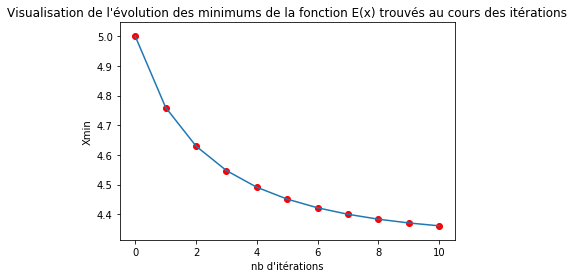

In [9]:
def DG(div_e, x0, n, eps = 0.01, nb_max_iter = 1000):
    cpp = 0 # compteur pour calculer le nombre d'itération
    Xmins = []
    Xmins.append(x0)
    while True:
        # calculer le nouveau x (xi+1)
        x1 = x0 - n*div_e.subs(x, x0).evalf()
        cpp += 1
        # condition d'arrêt
        Xmins.append(x1)
        if ( abs(x1 - x0) < eps ) | ( cpp > nb_max_iter ):
            break
        x0 = x1
    # resultat return le nouveau x et le nombre d'itération
    return [Xmins, cpp]

import numpy as np
import matplotlib.pyplot as plt

xmins, nb_ite = np.array(DG(div_exp, 5, 0.01))

plt.scatter(range(nb_ite+1), xmins, c='r')
plt.plot(range(nb_ite+1), xmins)
plt.xlabel('nb d\'itérations')
plt.ylabel('Xmin')
plt.title('Visualisation de l\'évolution des minimums de la fonction E(x) trouvés au cours des itérations')
plt.show()


### 6. Testez votre algorithme avec d’autres valeurs de eps et nombre max.

In [10]:
def sprint(div_e, data):
    xmin, ite = DG(div_e, data[0], data[1])
    print('-'*60)
    print('| \tPour x0 = ', data[0],' et η = ', data[1], '\t:\t\t   |')
    print('-'*60)
    print('| xmin \t\t\t| ', xmin, "\t\t   |")
    xmin_f = exp.subs(x, xmin).evalf()
    print('| E(xmin) \t\t| ', xmin_f, "\t\t   |")
    print('| nomber des iteration \t| ', ite, "\t\t\t\t   |")
    return xmin, xmin_f

dict1 = [[1, 0.001], [6, 0.001], [6, 0.01], [4, 0.1], [4, 0.17]]

for d in dict1:
    sprint(div_exp, d)

------------------------------------------------------------
| 	Pour x0 =  1  et η =  0.001 	:		   |
------------------------------------------------------------
| xmin 			|  [1, 1.00800000000000] 		   |
| E(xmin) 		|  x**4 - 11.0*x**3 + 41.0*x**2 - 61.0*x + 30.0 		   |
| nomber des iteration 	|  1 				   |
------------------------------------------------------------
| 	Pour x0 =  6  et η =  0.001 	:		   |
------------------------------------------------------------
| xmin 			|  [6, 5.89300000000000, 5.79818438917200, 5.71344305858812, 5.63714841968474, 5.56802121065637, 5.50503952526897, 5.44737544559007, 5.39434985365062, 5.34539953823634, 5.30005281371908, 5.25791115469927, 5.21863516112886, 5.18193369253159, 5.14755535614586, 5.11528176723680, 5.08492216009623, 5.05630904013533, 5.02929464677417, 5.00374805382113, 4.97955277551832, 4.95660477698370, 4.93481081053332, 4.91408701648401, 4.89435774003588, 4.87555452579438, 4.85761525918669, 4.84048343001917, 4.82410749812207, 4.808440

------------------------------------------------------------
| 	Pour x0 =  4  et η =  0.17 	:		   |
------------------------------------------------------------
| xmin 			|  [4, 4.85000000000000, 1.99502000000001, 1.48336482859609, 1.29985340908275, 1.53520416176282, 1.26598771774773, 1.59966520234823, 1.24239070441334, 1.64867602179201, 1.23755864714305, 1.65913290291893, 1.23794109228987, 1.65830002269115, 1.23789273162030, 1.65840529160171, 1.23789867346069, 1.65839235694491, 1.23789794071211, 1.65839395203680, 1.23789803103382, 1.65839375541879, 1.23789801989976, 1.65839377965613, 1.23789802127225, 1.65839377666839, 1.23789802110307, 1.65839377703668, 1.23789802112392, 1.65839377699128, 1.23789802112135, 1.65839377699688, 1.23789802112168, 1.65839377699618, 1.23789802112163, 1.65839377699627, 1.23789802112164, 1.65839377699626, 1.23789802112164, 1.65839377699626, 1.23789802112164, 1.65839377699626, 1.23789802112164, 1.65839377699626, 1.23789802112164, 1.65839377699626, 1.2378980211

<br/><br/><br/>
# Descente de gradient pour la régression linéaire

***

<br/>

### 1. Calculation des dérivées partielles de la fonction G(a; b) selon a et b


In [11]:
# In our example, G(x,y) = SUM(ax+y - y)
def G(x, y, a, b):
    return np.sum((a*x+b-y)**2)
# define derive of fonction
def derive_G(x, y, a, b):
    return {'dx': 2*(a*x**2+b*x-y*x), 'dy': 2*(a*x+b-y)}

def y(x, a, b):
    return (a*x+b)

### 2. Implémentez l’algorithme DGR

In [12]:
#Gradient Descent implied for a regression linear case with data
def gradient_reg(max_iter, step, x, y, df,eps = 0.01):
    #Const
    nb_sample_data = x.shape[0]
    rg_sample = range(1, nb_sample_data)
    
    #initialisation
    a = 5 #np.random.random(x.shape[1])
    b = 5 #np.random.random(x.shape[1])
    E = sum([a*x[j]+b-y[j] for j in rg_sample]) 
    
#     print(E)
    for i in range(max_iter):
        #Compute gradient
        grad_a = sum([2*(a*x[j]**2+b*x[j]-y[j]*x[j]) for j in rg_sample])
        grad_b = sum([2*(a*x[j]+b-y[j]) for j in rg_sample])
        
        #Descente de gradient
        a = a - step * grad_a
        b = b - step * grad_b

        
        #Compute error
        e = sum([a*x[j]+b-y[j] for j in rg_sample])

        if abs(E-e) <= eps:
            return ({'a': a, 'b': b}, i)
            
        E = e

    return ({'a': a, 'b': b}, max_iter)

### 3. test d’algorithme implémenté

In [13]:
from sklearn import datasets
x_reg, y_reg = datasets.make_regression(n_samples=100, n_features=1, noise=7)
all_final_reg = []
print(x_reg.reshape(100).shape)
print(y_reg.shape)

(100,)
(100,)


In [14]:
def show_res_reg(vect,derive_G):
    print("***************************************************************")
    res,nb_ite = gradient_reg(vect[0],vect[1],vect[2],vect[3],derive_G)
    print("for initial max iteration = ",vect[0]," , step = ",vect[1])
    print(' ==> final_a = ',res['a'],' final_b = ',res['b'],'nb_iteration = ',nb_ite)
    pry = [y(x_d[0],res['a'],res['b']) for x_d in x_reg]
#     print("final result =  ",G(x_reg,y_reg,res['a'],res['b']))
    print('E(', x_reg[0][0], ') = ', pry[0])
    all_final_reg.append(pry)
    print("***************************************************************")


### 4. Affichage des resultas trouvés 

In [15]:
all_final_reg = []
show_res_reg([100,0.001,x_reg,y_reg],derive_G)
show_res_reg([500,0.001,x_reg,y_reg],derive_G)
show_res_reg([1000,0.001,x_reg,y_reg],derive_G)
show_res_reg([100,0.01,x_reg,y_reg],derive_G)
show_res_reg([100,1,x_reg,y_reg],derive_G)

***************************************************************
for initial max iteration =  100  , step =  0.001
 ==> final_a =  [93.66725942]  final_b =  [0.01392354] nb_iteration =  49
E( -0.7493494090740423 ) =  [-70.17558196]
***************************************************************
***************************************************************
for initial max iteration =  500  , step =  0.001
 ==> final_a =  [93.66725942]  final_b =  [0.01392354] nb_iteration =  49
E( -0.7493494090740423 ) =  [-70.17558196]
***************************************************************
***************************************************************
for initial max iteration =  1000  , step =  0.001
 ==> final_a =  [93.66725942]  final_b =  [0.01392354] nb_iteration =  49
E( -0.7493494090740423 ) =  [-70.17558196]
***************************************************************
***************************************************************
for initial max iteration =  100  , step =  0.01
 

### 5. utilisation des stats.linregress de scipy

In [16]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x_reg.reshape(100), y_reg)
np.array(all_final_reg[0]).shape

(100, 1)

### 6. Visualisation

r-squared: 0.9953015220740956
r-squared: 0.9953015220740956
r-squared: 0.9953015220740956


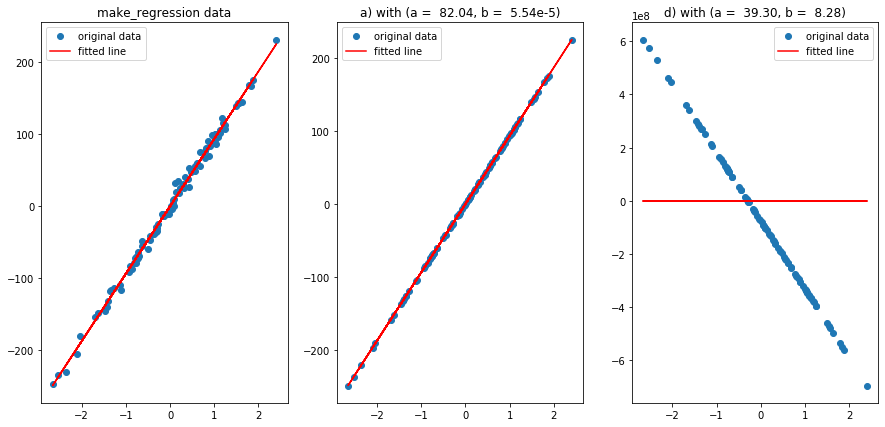

In [17]:

print("r-squared:", r_value**2)

plt.rcParams["figure.figsize"] = (15,7)
plt.subplot(1, 3, 1)
plt.plot(x_reg, y_reg, 'o', label='original data')
plt.plot(x_reg, intercept + slope*x_reg, 'r', label='fitted line')
plt.title('make_regression data')
plt.legend()


print("r-squared:", r_value**2)
plt.subplot(1, 3, 2)
plt.plot(x_reg, all_final_reg[0], 'o', label='original data')
plt.plot(x_reg, intercept + slope*x_reg, 'r', label='fitted line')
plt.title('a) with (a =  82.04, b =  5.54e-5)')
plt.legend()

print("r-squared:", r_value**2)
plt.subplot(1, 3, 3)
plt.plot(x_reg, all_final_reg[3], 'o', label='original data')
plt.plot(x_reg, intercept + slope*x_reg, 'r', label='fitted line')
plt.title('d) with (a =  39.30, b =  8.28)')
plt.legend()

plt.show()

***
### Links
- [E-mail :](mailto:zakaria.abbou199434@gmail.com) zakaria.abbou199434@gmail.com
- [GitHub :](https://github.com/ZakariaAABBOU) github.com/ZakariaAABBOU
- [Linkedin :](https://www.linkedin.com/in/zakaria-aabbou/) linkedin.com/in/zakaria-aabbou/